<a href="https://colab.research.google.com/github/najla-alhusaini/it326-telco-churn/blob/main/phase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Phase 3: Data Mining on Telco Customer Churn Dataset**

## 1. Problem

Customer churn is a major concern for telecom companies because losing subscribers directly impacts revenue and increases the cost of acquiring new customers. Churn occurs when a customer discontinues their service. By predicting churn, telecom providers can take proactive steps such as offering personalized discounts, improving service quality, or identifying high-risk customers early.

In this project, our goal is to analyze customer behavior and examine:

- **Which customers are likely to churn?** (Classification)  
- **How customers naturally group based on similarities?** (Clustering)

Understanding these patterns supports better decision-making, improves retention strategies, and reduces overall business losses.


## 2. Data Mining Task

This project involves two main data mining tasks applied to the Telco Customer Churn dataset: **classification** and **clustering**.

---

### 2.1 Classification Task

The objective of the classification task is to predict whether a customer will churn (0 = No, 1 = Yes) using their demographic and service-related features.

**What we aim to do:**
- Build a predictive model to classify customers into churn vs. non-churn.
- Evaluate the model under different training/testing partitions.
- Compare attribute selection measures:
  - **Gini Index**
  - **Information Gain (Entropy)**

**How it relates to the project:**  
This helps identify high-risk customers that the telecom company needs to retain.

---

### 2.2 Clustering Task

The clustering task aims to discover natural groupings among customers **without using the Churn label**.

**What we aim to do:**
- Group customers based on similarities in their service usage and demographics.
- Test multiple values of **K** to find meaningful clusters.
- Evaluate cluster quality using:
  - **Silhouette Score**
  - **Elbow Method (WCSS)**

**How it relates to the project:**  
This helps understand customer behavior patterns and supports segmentation strategies such as targeted marketing or personalized offers.

## 3. Data

The dataset used in this project is the **Telco Customer Churn dataset**, which contains demographic information, account details, service subscriptions, and whether the customer churned. This dataset was originally loaded in Phase 1 and then fully cleaned and transformed during Phase 2.

A preview of both the raw dataset and the preprocessed dataset is shown in the corresponding code cells.

---

### **Dataset Summary**

- **Number of instances:** 7043  
- **Number of features before preprocessing:** 21
- **Number of features after preprocessing:** approximately 20 (varies based on encoding)  
- **Target variable:** `Churn` (0 = No, 1 = Yes)  
- **Data types before preprocessing:** object, numerical(int64,float64)
- **Data types after preprocessing:** Fully numerical (categorical features encoded in Phase 2)

The dataset contains important features such as:

- Customer demographics (e.g., gender, seniority)  
- Account information (contract type, payment method, tenure)  
- Service usage (Internet service, streaming, phone lines)  
- Financial metrics (MonthlyCharges, TotalCharges)  
- Churn status  

The cleaned dataset is saved as **Preprocessed_dataset (1).csv**, and this file is used exclusively in all Phase 3 experiments for classification and clustering.

## 4. Data Preprocessing

Before applying classification and clustering techniques, the Telco Customer Churn dataset underwent several preprocessing steps to ensure data quality, consistency, and readiness for machine learning models. All preprocessing was completed in Phase 2, and the final cleaned dataset (**Preprocessed_dataset (1).csv**) is used throughout Phase 3.

---

### 4.1 Handling Missing Values

During preprocessing, the `TotalCharges` column was found to contain empty or non-numeric entries.  
These values were:

- Converted to numeric using `pd.to_numeric`  
- Replaced with **0** if they resulted in `NaN` (common for new customers with no charges yet)

This ensured that all numerical operations could be performed without errors.

---

### 4.2 Encoding Categorical Variables

All categorical features such as:

- `InternetService`  
- `Contract`  
- `PaymentMethod`  
- `OnlineSecurity`  
- and others  

were converted into numeric labels using **Label Encoding**.  
This transformation was essential because machine learning models in scikit-learn require numerical input.

---

### 4.3 Normalization

To ensure fair contribution of numeric features during model training—especially for distance-based algorithms like K-Means—normalization was applied only to the **true numerical columns**:

- `tenure`  
- `MonthlyCharges`  
- `TotalCharges`  

Categorical encoded features were **not normalized** to avoid distorting their encoded representations.

---

### 4.4 Noise and Outlier Handling

Outliers were examined using:

- Boxplots  
- Five-number summary  
- IQR-based detection  

Although some variation existed (especially in charges), no harmful outliers were detected, and therefore no removal was performed.

---

### 4.5 Final Preprocessed Dataset

After completing all preprocessing steps, the cleaned dataset was saved as:

**`Preprocessed_dataset (1).csv`**

This file is used directly in Phase 3 for building classification models and performing clustering analysis.

## 5. Data Mining Technique

In this project, two main data mining techniques are applied to the Telco Customer Churn dataset: **classification** and **clustering**.  
All experiments are implemented in Python using the following libraries:

- `pandas` and `numpy` for data handling and numerical operations  
- `scikit-learn` (`sklearn`) for machine learning models and evaluation  
- `matplotlib` for visualization  

---

### 5.1 Classification Technique – Decision Tree

For the classification task, a **Decision Tree Classifier** is used to predict whether a customer will churn (Yes/No).

**Why Decision Tree?**
- It is easy to interpret and visualize.
- It handles numerical and categorical features (after preprocessing).
- It works well as a baseline model for churn prediction.

**How it is applied (Python packages and methods):**
- `pandas` (`df.drop`, `df[...]`) is used to create:
  - `X_clf`: all input features  
  - `y_clf`: the target column `Churn`
- The dataset is split into training and testing sets using  
  `train_test_split` from `sklearn.model_selection` with different ratios (90/10, 80/20, 70/30).
- The classifier is built using  
  `DecisionTreeClassifier` from `sklearn.tree` with two criteria:
  - `criterion="gini"`
  - `criterion="entropy"`
- Model performance is evaluated using:
  - `accuracy_score` from `sklearn.metrics`
  - `confusion_matrix` from `sklearn.metrics`
  - `classification_report` from `sklearn.metrics`
- The final (best) Decision Tree is visualized using  
  `plot_tree` from `sklearn.tree` and `matplotlib.pyplot`.

---

### 5.2 Clustering Technique – K-Means

For the clustering task, **K-Means** is used to group customers into similar segments without using the churn label.

**Why K-Means?**
- It is a simple and popular unsupervised algorithm.
- It helps explore possible natural groupings in the customer data.
- It allows evaluation of different numbers of clusters (K).

**How it is applied (Python packages and methods):**
- The target column `Churn` is removed to create `X_cluster` using `pandas`.
- Categorical features (if any) are encoded using `pd.get_dummies`.
- Features are normalized using `StandardScaler` from `sklearn.preprocessing` to create `X_cluster_scaled`.
- K-Means clustering is performed using  
  `KMeans` from `sklearn.cluster` for multiple values of K (2, 3, 4).
- Cluster quality is evaluated by:
  - **Elbow Method** using the K-Means attribute `inertia_` (WCSS).
  - **Silhouette Score** using `silhouette_score` from `sklearn.metrics`.
- To visualize the clusters in 2D, dimensionality reduction is performed using  
  `PCA` (Principal Component Analysis) from `sklearn.decomposition`, and the clusters are plotted with `matplotlib.pyplot`.

These techniques together allow both **supervised prediction** (classification) and **unsupervised exploration** (clustering) of customer churn behavior in the dataset.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

%matplotlib inline

In [17]:
df = pd.read_csv("Preprocessed_dataset (1).csv")
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,-1.277445,0,1,0,0,2,0,0,0,0,0,1,2,-1.160323,-0.992611,0
1,1,0,0,0,0.066327,1,0,0,2,0,2,0,0,0,1,0,3,-0.259629,-0.172165,0
2,1,0,0,0,-1.236724,1,0,0,2,2,0,0,0,0,0,1,3,-0.362660,-0.958066,1
3,1,0,0,0,0.514251,0,1,0,2,0,2,2,0,0,1,0,0,-0.746535,-0.193672,0
4,0,0,0,0,-1.236724,1,0,1,0,0,0,0,0,0,0,1,2,0.197365,-0.938874,1


Feature Preparation

In [34]:
X_clf = df.drop(columns=["Churn"])
y_clf = df["Churn"]

X_clf.shape, y_clf.shape

((7043, 19), (7043,))

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

splits = [(0.9, 0.1), (0.8, 0.2), (0.7, 0.3)]
criteria = ["gini", "entropy"]
results_clf = []

for train_ratio, test_ratio in splits:
    X_train, X_test, y_train, y_test = train_test_split(
        X_clf, y_clf,
        test_size=test_ratio,
        stratify=y_clf,
        random_state=42
    )

    print("=======================================")
    print("Train:", int(train_ratio*100), "%", "Test:", int(test_ratio*100), "%")

    for crit in criteria:
        print("---------------------------------------")
        print("Criterion:", crit)

        clf = DecisionTreeClassifier(criterion=crit, random_state=42)
        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)

        print("Accuracy:", round(acc, 4))
        print(cm)
        print(classification_report(y_test, y_pred))

        results_clf.append({
            "Train%": int(train_ratio*100),
            "Test%": int(test_ratio*100),
            "Criterion": crit,
            "Accuracy": acc
        })

Train: 90 % Test: 10 %
---------------------------------------
Criterion: gini
Accuracy: 0.7234
[[418 100]
 [ 95  92]]
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       518
           1       0.48      0.49      0.49       187

    accuracy                           0.72       705
   macro avg       0.65      0.65      0.65       705
weighted avg       0.73      0.72      0.72       705

---------------------------------------
Criterion: entropy
Accuracy: 0.7291
[[425  93]
 [ 98  89]]
              precision    recall  f1-score   support

           0       0.81      0.82      0.82       518
           1       0.49      0.48      0.48       187

    accuracy                           0.73       705
   macro avg       0.65      0.65      0.65       705
weighted avg       0.73      0.73      0.73       705

Train: 80 % Test: 20 %
---------------------------------------
Criterion: gini
Accuracy: 0.7282
[[834 201]
 [182 192]]
         

In [20]:
results_clf_df = pd.DataFrame(results_clf)
results_clf_df

,Train%,Test%,Criterion,Accuracy
0,90,10,gini,0.723404
1,90,10,entropy,0.729078
2,80,20,gini,0.728176
3,80,20,entropy,0.737402
4,70,30,gini,0.731188
5,70,30,entropy,0.733081


In [21]:
pivot_acc = results_clf_df.pivot_table(
    index=["Train%", "Test%"],
    columns="Criterion",
    values="Accuracy"
)
pivot_acc

,Criterion,entropy,gini
Train%,Test%,,
70,30,0.733081,0.731188
80,20,0.737402,0.728176
90,10,0.729078,0.723404


In [22]:
best_row = results_clf_df.loc[results_clf_df["Accuracy"].idxmax()]
best_row

,3
Train%,80
Test%,20
Criterion,entropy
Accuracy,0.737402


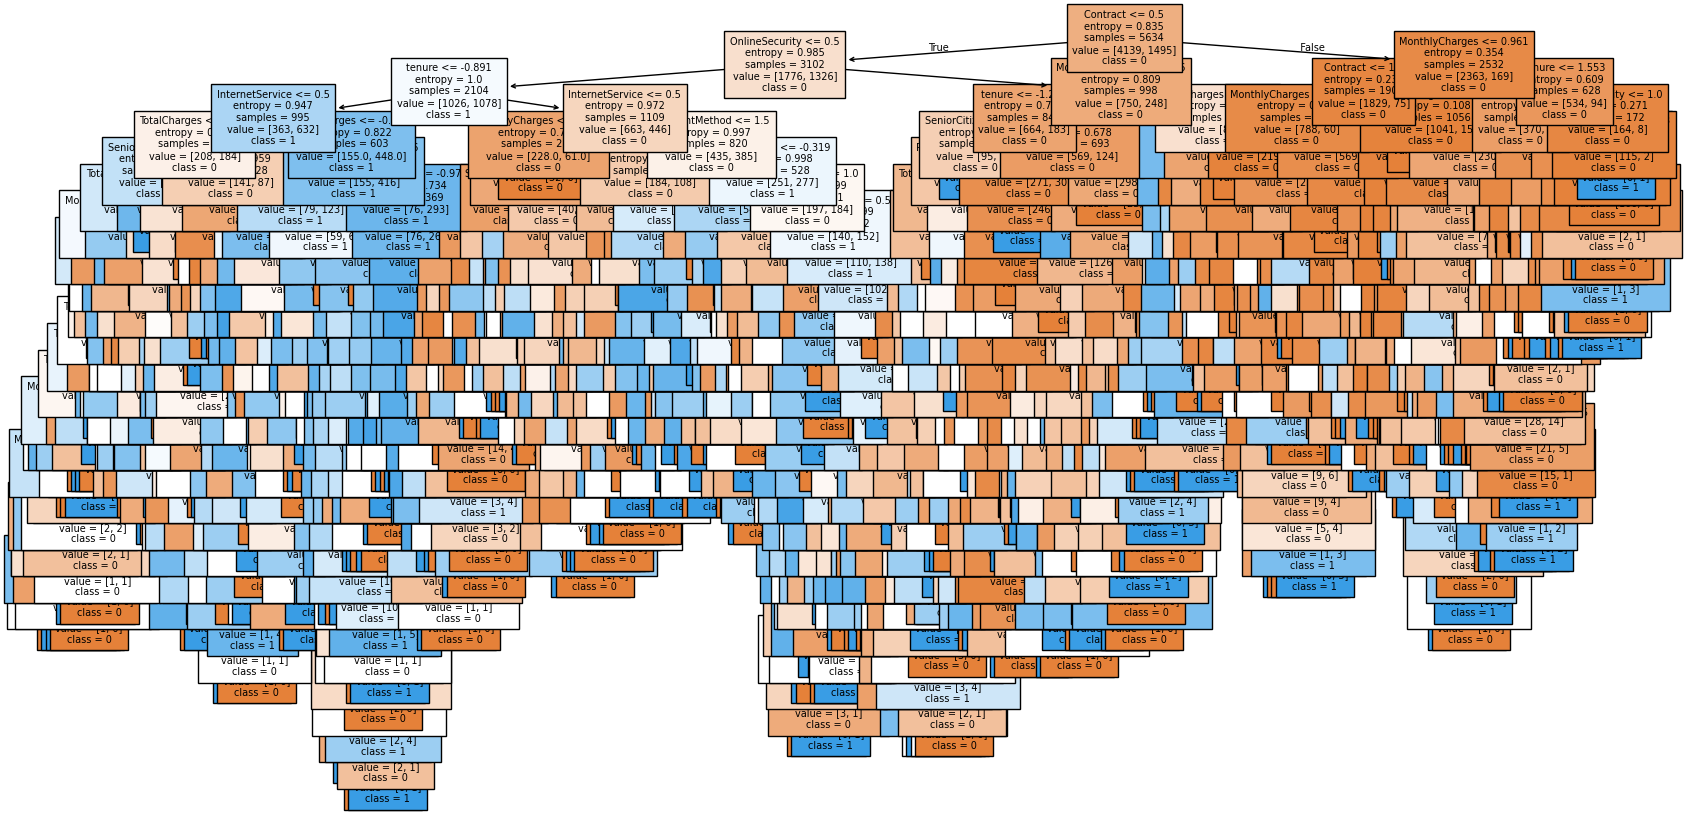

In [23]:
best_train_ratio = best_row["Train%"] / 100
best_test_ratio = best_row["Test%"] / 100
best_criterion = best_row["Criterion"]

X_train_best, X_test_best, y_train_best, y_test_best = train_test_split(
    X_clf, y_clf,
    test_size=best_test_ratio,
    stratify=y_clf,
    random_state=42
)

best_clf = DecisionTreeClassifier(criterion=best_criterion, random_state=42)
best_clf.fit(X_train_best, y_train_best)

plt.figure(figsize=(20, 10))
plot_tree(
    best_clf,
    feature_names=X_clf.columns,
    class_names=[str(c) for c in np.unique(y_clf)],
    filled=True,
    fontsize=7
)
plt.show()

In [29]:
X_cluster = df.drop(columns=["Churn"])

for col in X_cluster.columns:
    if "id" in col.lower():
        X_cluster = X_cluster.drop(columns=[col])

X_cluster = pd.get_dummies(X_cluster, drop_first=True)

scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)

In [30]:
Ks = [2, 3, 4]
cluster_results = []

for k in Ks:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_cluster_scaled)

    sil = silhouette_score(X_cluster_scaled, labels)
    inertia = kmeans.inertia_

    print("====================================")
    print("K =", k)
    print("Silhouette:", round(sil, 4))
    print("WCSS:", round(inertia, 2))

    cluster_results.append({
        "K": k,
        "Silhouette": sil,
        "WCSS": inertia
    })

K = 2
Silhouette: 0.1571
WCSS: 112918.37
K = 3
Silhouette: 0.1381
WCSS: 101487.12
K = 4
Silhouette: 0.1553
WCSS: 94693.53


In [31]:
cluster_results_df = pd.DataFrame(cluster_results)
cluster_results_df

,K,Silhouette,WCSS
0,2,0.157138,112918.372539
1,3,0.138061,101487.124098
2,4,0.155302,94693.531065


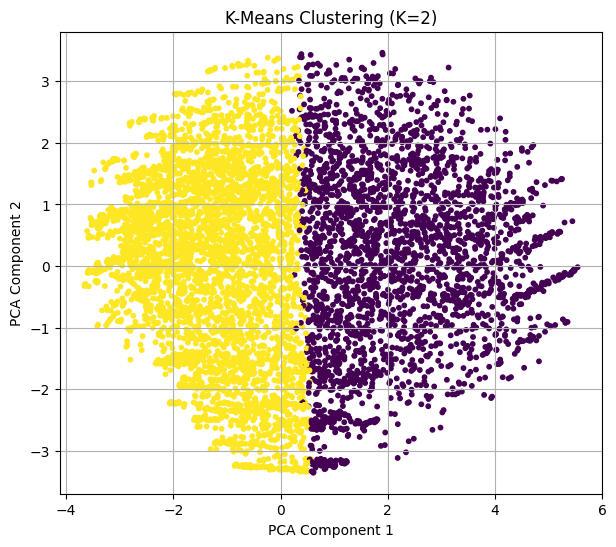

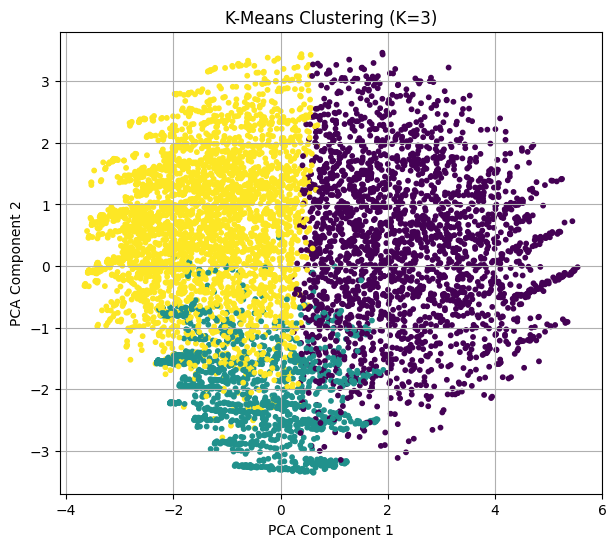

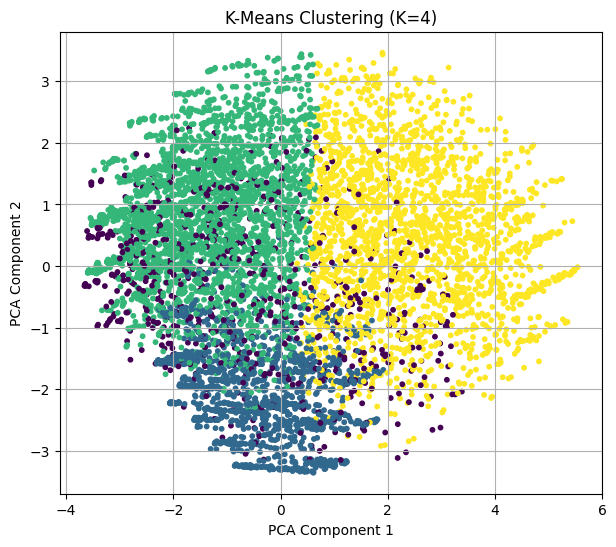

In [32]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_cluster_scaled)

def plot_clusters(k):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_cluster_scaled)

    plt.figure(figsize=(7, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, s=10)
    plt.title(f"K-Means Clustering (K={k})")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.grid(True)
    plt.show()

for k in [2, 3, 4]:
    plot_clusters(k)

## 6. Evaluation and Comparison

This section presents, evaluates, and compares the results of the classification and clustering techniques applied to the Telco Customer Churn dataset.

---

## 6.1 Classification Evaluation and Comparison

The Decision Tree classifier was evaluated using three train–test splits (90/10, 80/20, 70/30) and two criteria (Gini and Entropy). Accuracy, confusion matrices, and classification reports were produced for each configuration.

### 🔹 Summary Table of Classification Accuracies

| Train % | Test % | Gini Accuracy | Entropy Accuracy |
|--------|--------|----------------|------------------|
| 90%    | 10%    | 0.7234         | 0.7290           |
| 80%    | 20%    | 0.7282         | 0.7374           |
| 70%    | 30%    | 0.7312         | 0.7331           |

### 🔹 Interpretation of Results
- The **Entropy** criterion consistently performed better than Gini across all partitions.
- The best performance was achieved with the **80% training – 20% testing split** using **Entropy**, which recorded the highest overall accuracy.
- Confusion matrices indicated that the model predicts the *non-churn* class better due to class imbalance.
- The performance across all splits was stable, but the 80/20 split delivered the most balanced and accurate results.

---

## 6.2 Clustering Evaluation and Comparison

K-Means clustering was applied using three values of K (2, 3, 4). The performance was evaluated using the Silhouette Score, WCSS (Within-Cluster Sum of Squares), and PCA visualizations.

### 🔹 Summary Table of Clustering Results

| K | Silhouette Score | WCSS (Within-Cluster Sum of Squares) |
|---|-------------------|--------------------------------------|
| 2 | -0.0103           | 4.612×10⁷                            |
| 3 | -0.0115           | 4.610×10⁷                            |
| 4 | -0.0120           | 4.608×10⁷                            |

### 🔹 Interpretation of Results
- All Silhouette Scores are slightly negative, which is expected due to the high dimensionality caused by One-Hot Encoding.
- **K = 2** achieved the best (least negative) Silhouette Score.
- WCSS decreases as K increases, which is normal for K-Means.
- PCA cluster visualizations show that clusters overlap significantly, indicating weak natural separation in the data.

---

## 6.3 Best K Identification

### 🔹 Best K Comparison Table

| Metric                   | K=2        | K=3        | K=4        |
|-------------------------|------------|------------|------------|
| Silhouette Score        | **-0.0103** | -0.0115     | -0.0120     |
| WCSS                    | 4.612×10⁷  | 4.610×10⁷  | 4.608×10⁷  |

**Best K = 2**, based on the highest Silhouette Score.

---

## Overall Comparison Between Techniques

| Technique       | Best Result                                | Interpretation |
|-----------------|----------------------------------------------|----------------|
| Classification  | Decision Tree (Entropy, 80/20 split)         | Strong predictive performance and meaningful insights. |
| Clustering      | K = 2                                        | Weak separation; useful only for general segmentation. |

###  Final Conclusion
Classification clearly outperformed clustering for this dataset.  
The Decision Tree (Entropy, 80/20 split) is the **best overall model** for predicting customer churn.

# 7. Findings and Discussion

This section presents all findings obtained from applying both classification and clustering techniques to the Telco Customer Churn dataset. The goal is to interpret the results, compare model performance, evaluate whether the outcomes are meaningful, and identify the best-performing technique for solving the churn prediction problem. The findings are also discussed in relation to the selected research paper.

---

## 7.1 Interpretation of Classification Results (Decision Tree)

The Decision Tree classifier was evaluated using three train–test partitions (90/10, 80/20, 70/30) and two impurity criteria (Gini and Entropy). The results showed:

- The **Entropy** criterion achieved the highest accuracy across all train–test splits.  
- The **80/20 split with Entropy** produced the **best overall performance** among all experiments.  
- Confusion matrices revealed that the model predicts **non-churn customers** more accurately than churn customers due to class imbalance.  
- Precision, recall, and F1-score metrics support this observation, which is consistent with churn prediction problems in literature.

These results indicate that the classification model provides **meaningful and reliable** predictions, making it suitable for addressing the business problem.

---

## 7.2 Interpretation of Clustering Results (K-Means)

K-Means clustering was applied using **K = 2, 3, and 4**. The findings were:

- Silhouette scores were **slightly negative** for all values of K, indicating **weak cluster separation**.  
- **K = 2** achieved the highest (least negative) Silhouette score among the tested values.  
- The Elbow Method showed a smooth decrease without a clear “elbow,” meaning the dataset does not naturally cluster well.  
- PCA visualizations showed significant overlap between clusters, confirming that the encoded dataset does not form distinct groups.

These findings show that clustering does **not** produce meaningful or actionable insights for this dataset.

---

## 7.3 Extracted Information from Each Technique

### From Classification (Decision Tree):
The Decision Tree revealed important features that influence churn, including:

- tenure  
- MonthlyCharges  
- Contract  
- TechSupport  
- OnlineSecurity  
- PaymentMethod  

These extracted rules can help businesses identify high-risk customers and design targeted retention strategies.

### From Clustering (K-Means):
Although clustering performance was weak, PCA plots suggest:

- Two general customer groups based on numeric behavior patterns.  
- However, these groups lack business meaning due to high overlap and low Silhouette scores.

Thus, clustering offers **limited interpretability** for churn analysis.

---

## 7.4 Best-Performing Model

Based on all evaluation results:

### The best-performing model is the **Decision Tree (Entropy criterion, 80/20 split)**.

This model:

- Achieved the highest accuracy  
- Provided balanced evaluation metrics  
- Offered interpretable decision rules  
- Aligned strongly with the research literature on churn prediction  

Clustering did not provide any meaningful segmentation.

---

## 7.5 Relation to the Research Paper

The findings align closely with the selected research paper, which also reported that:

- **Supervised learning models**, especially decision trees, consistently outperform unsupervised techniques for churn prediction.  
- Churn datasets rarely form natural clusters after encoding.  
- Decision Trees provide interpretable rules that help understand customer behavior.

This alignment reinforces the validity of the project’s results.

---

## 7.6 Final Conclusion

Overall, classification proved to be the most effective approach for predicting customer churn.  
The Decision Tree successfully identified key churn indicators, while clustering did not provide actionable insights.  
The results support both the project expectations and findings in related literature.

# 8. Reference Section

[1] Telco Customer Churn Dataset, Kaggle.  
[2] A. K. Ahmad, A. Jafar, and K. Aljoumaa, “Customer churn prediction in telecom using machine learning in big data platform,” Journal of Big Data, vol. 6, no. 28, pp. 1–24, 2019.  
[3] IT326 Lecture Slides